One can read all datasets directly from the disk and avoid doing the time consuming processing

In [2]:
import pandas as pd

# Load data from the disk
elo_rates = pd.read_csv("archive/elo_rates_enriched.csv", index_col=0)
df_atp = pd.read_csv("archive/atp_data_enriched.csv", index_col=0)
# df_conf = pd.read_csv("archive/confidence_data.csv")

df_atp["Date"] = pd.to_datetime(df_atp["Date"])

# Drop 350 rows where bet odds are absent
# We just ignore the odds for losers cause they do not appear in our futher analysis.
df_atp_reduced = df_atp.dropna(subset=["PSW", "B365W"], axis=0)

# Save dataframes on the disk
df_atp_reduced.to_csv("archive/df_atp_reduced.csv")

# Display the first few rows to verify the changes
df_atp_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49163 entries, 125 to 64574
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   ATP                               49163 non-null  int64         
 1   Location                          49163 non-null  object        
 2   Tournament                        49163 non-null  object        
 3   Date                              49163 non-null  datetime64[ns]
 4   Series                            49163 non-null  object        
 5   Court                             49163 non-null  object        
 6   Surface                           49163 non-null  object        
 7   Round                             49163 non-null  object        
 8   Best of                           49148 non-null  float64       
 9   Winner                            49163 non-null  object        
 10  Loser                             49163 non-null 

In [3]:
df_atp_reduced.tail()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,match_count_outdoor_clay_winner,match_count_outdoor_clay_loser,elo_outdoor_clay_winner,elo_outdoor_clay_loser,proba_elo_outdoor_clay,match_count_outdoor_grass_winner,match_count_outdoor_grass_loser,elo_outdoor_grass_winner,elo_outdoor_grass_loser,proba_elo_outdoor_grass
64570,68,Turin,Masters Cup,2022-11-18,Masters Cup,Indoor,Hard,Round Robin,NaN,Djokovic N.,...,327,54,1945.543435,1548.703881,0.907576,128,60,2031.642431,1669.640108,0.889324
64571,68,Turin,Masters Cup,2022-11-18,Masters Cup,Indoor,Hard,Round Robin,NaN,Rublev A.,...,100,123,1690.520786,1806.636908,0.338851,27,35,1625.000143,1597.077705,0.540097
64572,68,Turin,Masters Cup,2022-11-19,Masters Cup,Indoor,Hard,Semifinals,NaN,Djokovic N.,...,327,64,1945.543435,1568.251261,0.897695,128,44,2031.642431,1571.271783,0.934018
64573,68,Turin,Masters Cup,2022-11-19,Masters Cup,Indoor,Hard,Semifinals,NaN,Ruud C.,...,175,100,1768.907144,1690.520786,0.610931,12,27,1454.898202,1625.000143,0.273053
64574,68,Turin,Masters Cup,2022-11-20,Masters Cup,Indoor,Hard,The Final,NaN,Djokovic N.,...,327,175,1945.543435,1768.907144,0.734349,128,12,2031.642431,1454.898202,0.965109


# Get a sense of the bet odds:

In [4]:
df_atp_reduced[["PSW", "PSL", "B365W", "B365L"]].describe()

,PSW,PSL,B365W,B365L
count,49163.000000,49163.000000,49163.000000,49163.000000
mean,1.926425,4.019312,1.836080,3.517709
std,1.281068,5.087492,1.124214,3.489453
min,0.972000,1.010000,0.971000,0.967000
25%,1.280000,1.781000,1.250000,1.720000
50%,1.560000,2.610000,1.500000,2.500000
75%,2.150000,4.110000,2.100000,3.750000
max,46.000000,121.000000,34.000000,101.000000


In [5]:
elo_rates.describe()

,pts,match_count,elo,match_count_indoor_hard,elo_indoor_hard,match_count_indoor_carpet,elo_indoor_carpet,match_count_indoor_clay,elo_indoor_clay,match_count_outdoor_hard,elo_outdoor_hard,match_count_outdoor_clay,elo_outdoor_clay,match_count_outdoor_grass,elo_outdoor_grass
count,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000
mean,360.519680,79.464945,1500.000000,11.856089,1500.000000,2.083641,1500.000000,0.431734,1500.000000,31.316113,1500.000000,25.028290,1500.000000,8.749077,1500.000000
std,614.882441,162.814300,85.501161,27.523085,49.943204,7.029810,21.621552,1.945871,8.933088,67.915321,71.878688,55.586765,64.697092,19.078713,50.862880
min,0.000000,1.000000,1317.849260,0.000000,1361.638420,0.000000,1397.458084,0.000000,1416.600077,0.000000,1268.994093,0.000000,1335.168210,0.000000,1335.573562
25%,6.250000,2.000000,1461.253696,0.000000,1484.000000,0.000000,1500.000000,0.000000,1500.000000,0.000000,1471.658943,0.000000,1477.234823,0.000000,1484.000000
50%,165.000000,8.000000,1483.177157,1.000000,1500.000000,0.000000,1500.000000,0.000000,1500.000000,2.000000,1500.000000,2.000000,1500.000000,1.000000,1500.000000
75%,443.000000,75.000000,1505.531814,8.000000,1500.000000,0.000000,1500.000000,0.000000,1500.000000,25.000000,1500.000000,21.750000,1500.000000,8.000000,1500.000000
max,6730.000000,1442.000000,2023.710680,251.000000,1945.849970,69.000000,1743.530935,22.000000,1625.072438,638.000000,2150.271990,500.000000,2114.613427,213.000000,2031.642431


Number of matches held on each year


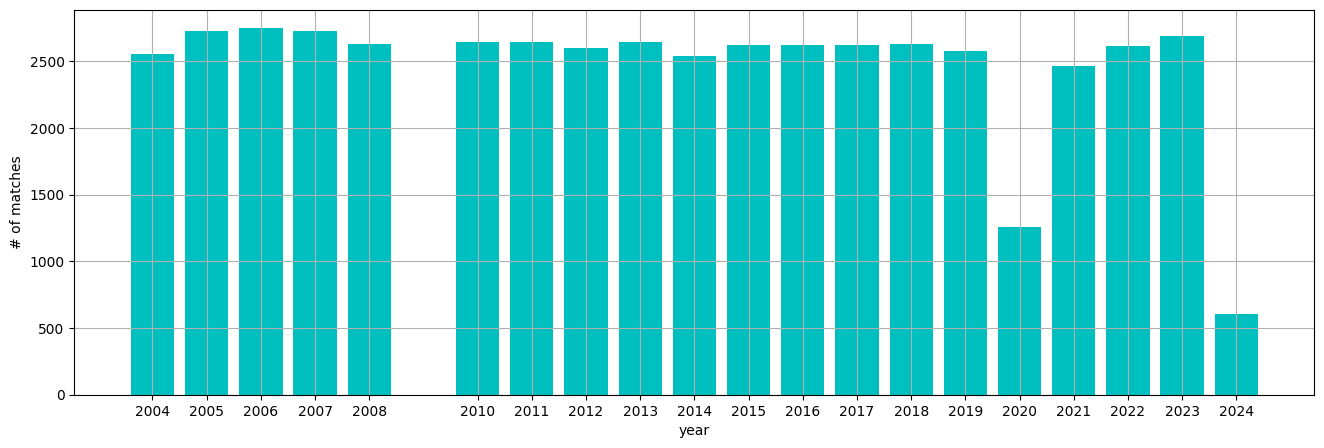

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

s_data = df_atp_reduced["Date"].dt.year.value_counts()

print("Number of matches held on each year")

# Create a histogram of Pinnacle Sports' bets on the the winner
plt.figure(figsize=(16, 5))
plt.grid()
plt.bar(x=s_data.index, height=s_data.values, color="c")

# Add labels and title
plt.xlabel("year")
plt.ylabel("# of matches")
plt.xticks(s_data.index)

# Save the plot
plt.savefig("report/final/pictures/match-count-year-dist.pdf")

# Show the plot
plt.show()

In [7]:
import pandas as pd
import requests
import io

# Download the data
url_base = "http://tennis-data.co.uk/"

sess = requests.session()
year = 2009
url = f"{url_base}/{year}/{year}.xls"
resp = sess.get(url)
with open(f"archive/tournoments_{year}.xls", mode="wb") as file:
    file.write(resp.content)
df = pd.read_excel(io.BytesIO(resp.content), sheet_name=f"{year}", engine="calamine")

df["Date"] = pd.to_datetime(df["Date"])

df

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,B365W,B365L,EXW,EXL,LBW,LBL,SJW,SJL,UBW,UBL
0,1,Brisbane,Brisbane International,2009-01-04,ATP250,Outdoor,Hard,1st Round,3,Gasquet R.,...,1.25,3.75,1.27,3.81,1.28,3.500,1.25,3.500,1.27,3.60
1,1,Brisbane,Brisbane International,2009-01-04,ATP250,Outdoor,Hard,1st Round,3,Dent T.,...,2.75,1.40,NaN,NaN,NaN,NaN,NaN,NaN,3.00,1.37
2,1,Brisbane,Brisbane International,2009-01-04,ATP250,Outdoor,Hard,1st Round,3,Benneteau J.,...,2.10,1.66,2.25,1.65,2.10,1.660,2.10,1.727,1.96,1.80
3,1,Brisbane,Brisbane International,2009-01-04,ATP250,Outdoor,Hard,1st Round,3,Soderling R.,...,1.44,2.62,1.49,2.65,1.53,2.370,1.50,2.625,1.40,2.85
4,1,Brisbane,Brisbane International,2009-01-05,ATP250,Outdoor,Hard,1st Round,3,Nieminen J.,...,2.00,1.72,1.95,1.85,1.83,1.830,2.00,1.800,1.88,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,65,London,Masters Cup,2009-11-27,Masters Cup,Indoor,Hard,Round Robin,3,Djokovic N.,...,1.40,2.87,1.40,2.85,1.40,2.750,1.40,2.880,1.40,2.86
2727,65,London,Masters Cup,2009-11-27,Masters Cup,Indoor,Hard,Round Robin,3,Davydenko N.,...,1.72,2.10,1.75,2.00,1.73,2.000,1.80,2.000,1.76,2.04
2728,65,London,Masters Cup,2009-11-28,Masters Cup,Indoor,Hard,Semifinals,3,Davydenko N.,...,4.33,1.22,3.75,1.26,4.00,1.222,3.75,1.250,3.85,1.25
2729,65,London,Masters Cup,2009-11-28,Masters Cup,Indoor,Hard,Semifinals,3,Del Potro J.M.,...,1.53,2.50,1.55,2.35,1.53,2.380,1.53,2.500,1.60,2.30


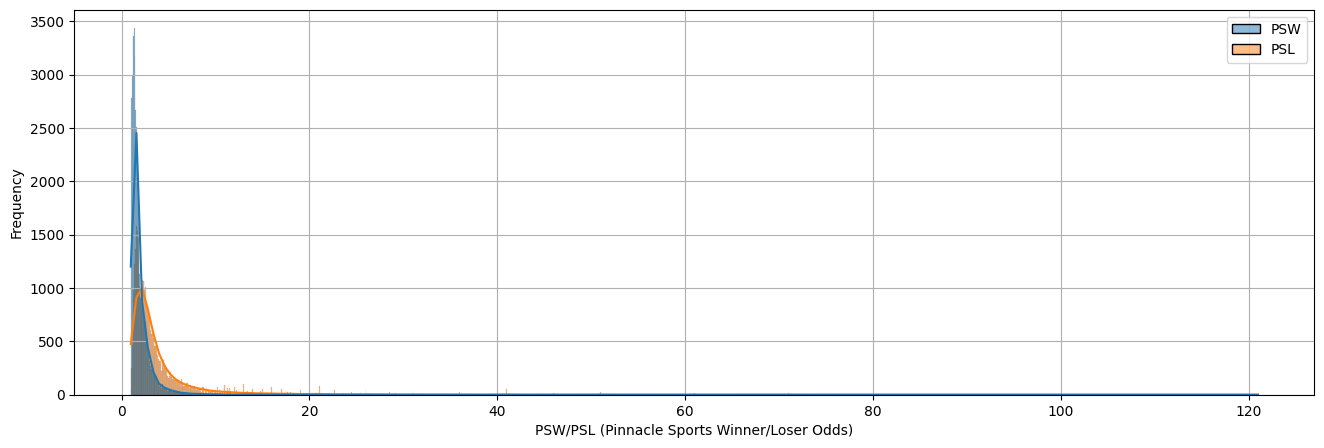

They max on 46.0 (for winners) and 121.0 (for losers).


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of Pinnacle Sports' bets on the the winner
plt.figure(figsize=(16, 5))
plt.grid()
sns.histplot(df_atp_reduced[["PSW", "PSL"]], kde=True, color=[["green"], ["red"]])

# Add labels and title
# plt.title('Distribution of Pinnacle Sports Winner/Loser Odds')
plt.xlabel('PSW/PSL (Pinnacle Sports Winner/Loser Odds)')
plt.ylabel('Frequency')

# Save the plot
plt.savefig("report/final/pictures/ps-odds-dist.pdf")

# Show the plot
plt.show()
print(f"They max on {df_atp_reduced['PSW'].max()} (for winners) and {df_atp_reduced['PSL'].max()} (for losers).")

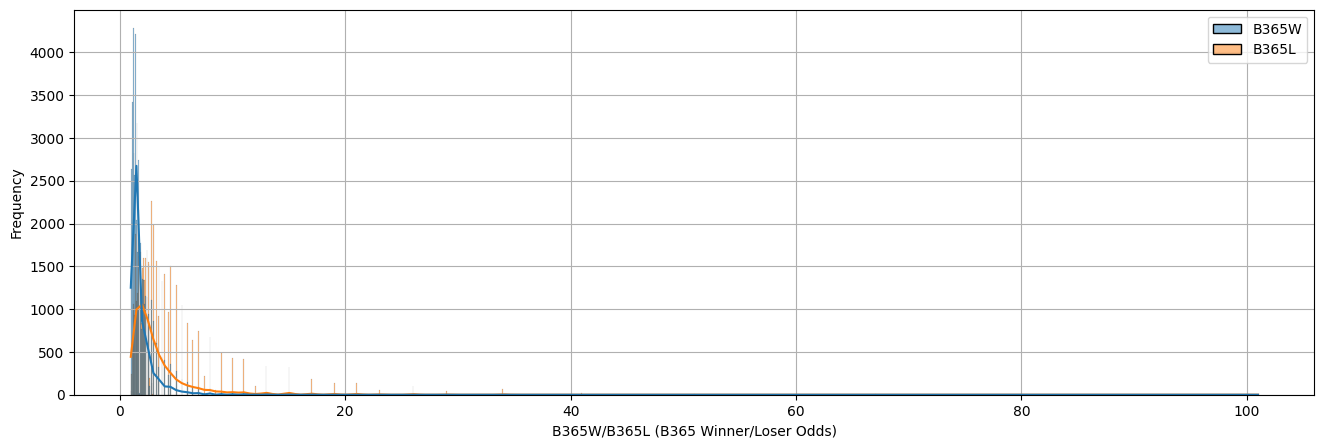

They max on 34.0 (for winners) and 101.0 (for losers).


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of B365 bets on the the winner
plt.figure(figsize=(16, 5))
plt.grid()
sns.histplot(df_atp_reduced[["B365W", "B365L"]], kde=True, color=["green", "red"])

# Add labels and title
# plt.title('Distribution of B365 Winner/Loser Odds')
plt.xlabel('B365W/B365L (B365 Winner/Loser Odds)')
plt.ylabel('Frequency')

# Save the plot
plt.savefig("report/final/pictures/b365-odds-dist.pdf")

# Show the plot
plt.show()
print(f"They max on {df_atp_reduced['B365W'].max()} (for winners) and {df_atp_reduced['B365L'].max()} (for losers).")

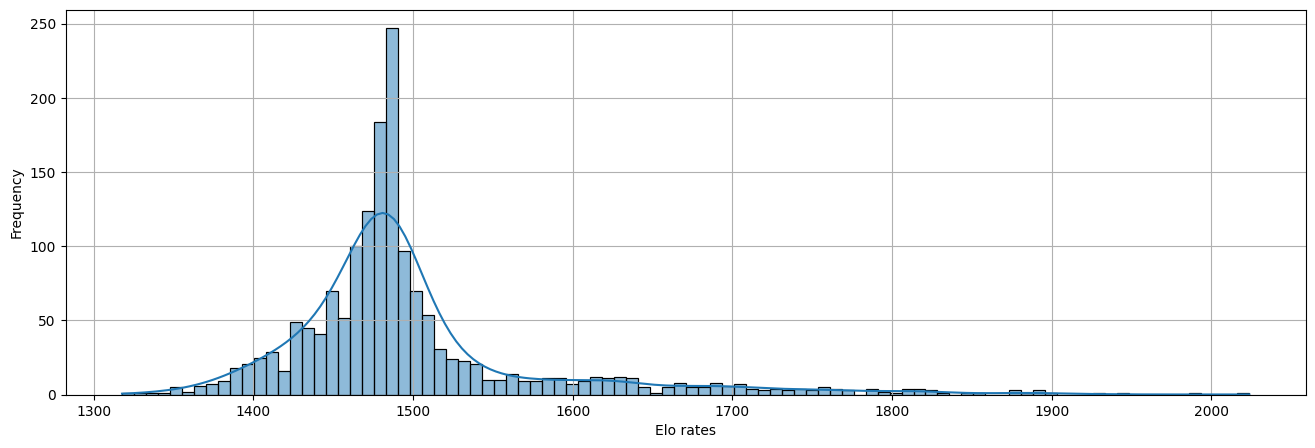

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of Pinnacle Sports' bets on the the winner
plt.figure(figsize=(16, 5))
plt.grid()
sns.histplot(elo_rates["elo"], kde=True)

# Add labels and title
# plt.title('Distribution of elo rates and atp points')
plt.xlabel('Elo rates')
plt.ylabel('Frequency')

# Save the plot
plt.savefig("report/final/pictures/elo-rates-dist.pdf")

# Show the plot
plt.show()

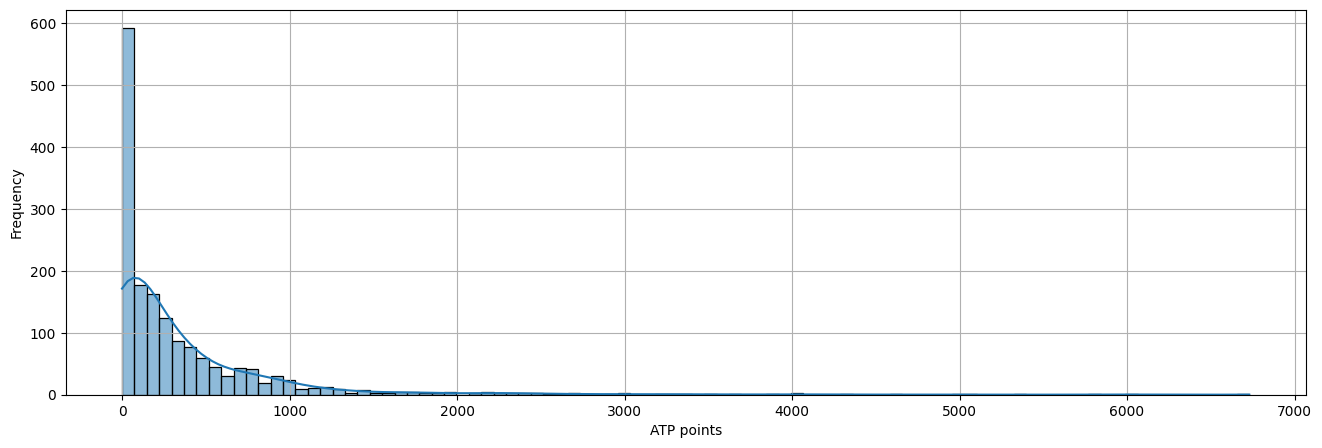

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of Pinnacle Sports' bets on the the winner
plt.figure(figsize=(16, 5))
plt.grid()
sns.histplot(elo_rates["pts"], kde=True)

# Add labels and title
# plt.title('Distribution of elo rates and atp points')
plt.xlabel('ATP points')
plt.ylabel('Frequency')

# Save the plot
plt.savefig("report/final/pictures/atp-point-dist.pdf")

# Show the plot
plt.show()

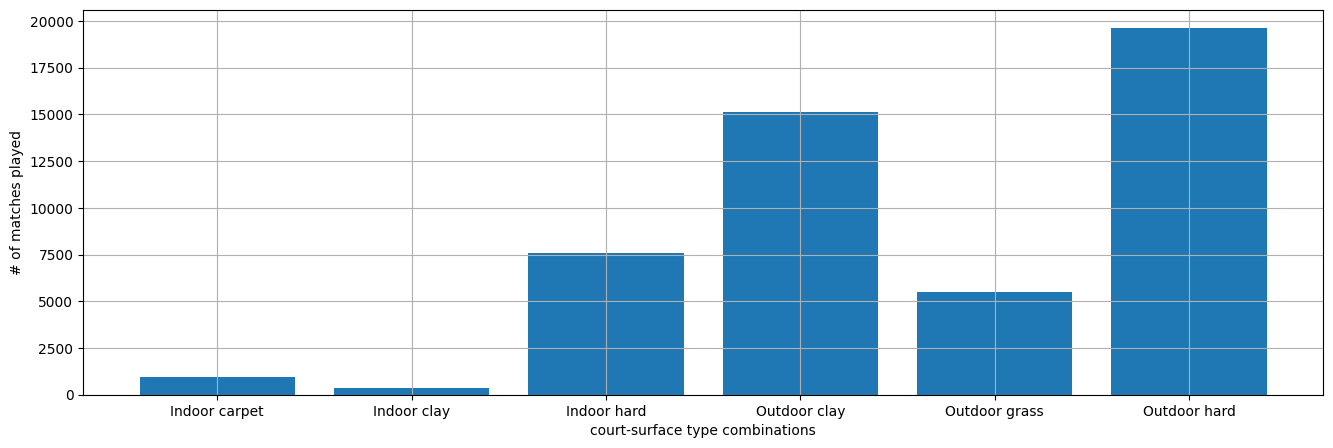

In [12]:
import matplotlib.pyplot as plt

df_fields = df_atp_reduced[["Court", "Surface", "ATP"]].groupby(by=["Court", "Surface"]).agg({"ATP": "count"}).reset_index().rename({"ATP": "match_count"}, axis=1)

# Plot
plt.figure(figsize=(16, 5))
plt.grid()
plt.bar(x=df_fields["Court"] + " " + df_fields["Surface"].str.lower(), height=df_fields["match_count"])

# Add labels and title
# plt.xticks(rotation=0)
plt.ylabel("# of matches played")
plt.xlabel("court-surface type combinations")

# Save the plot
plt.savefig("report/final/pictures/match-count-field-type-dist.pdf")

plt.show()

Accordingly, the total number of the matches played on the ``indoor clay`` and ``carpet`` surfaces are insignificant compared to the rest.

# Top 10 players over all (without considering the field type):

Top 25 players over all (without considering the field type):


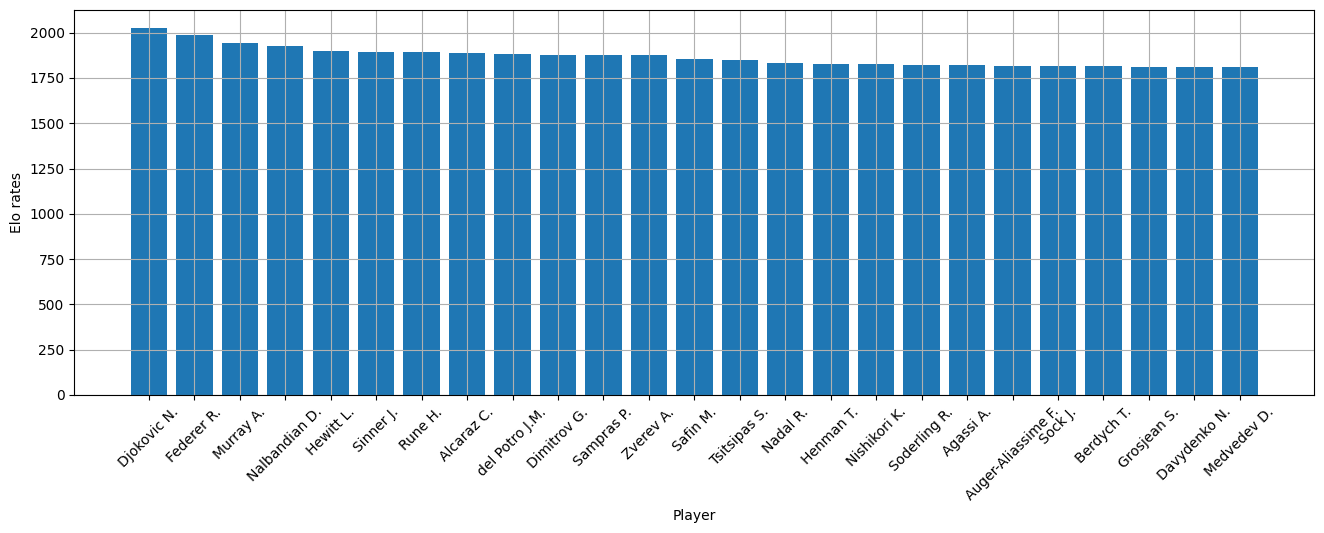

In [24]:
import matplotlib.pyplot as plt

n_top = 25
df_rates = elo_rates[["Player", "elo"]].sort_values(by="elo", ascending=False)

print(f"Top {n_top} players over all (without considering the field type):")

# Plot
plt.figure(figsize=(16, 5))
plt.grid()
plt.bar(x=df_rates["Player"].iloc[:n_top], height=df_rates["elo"].iloc[:n_top])

# Add labels and title
plt.xticks(rotation=45)
plt.xlabel("Player")
plt.ylabel("Elo rates")

# Save the plot
plt.savefig(f"report/final/pictures/top-{n_top}-elo-rates.pdf")

plt.show()

Top 25 players over all (without considering the field type):


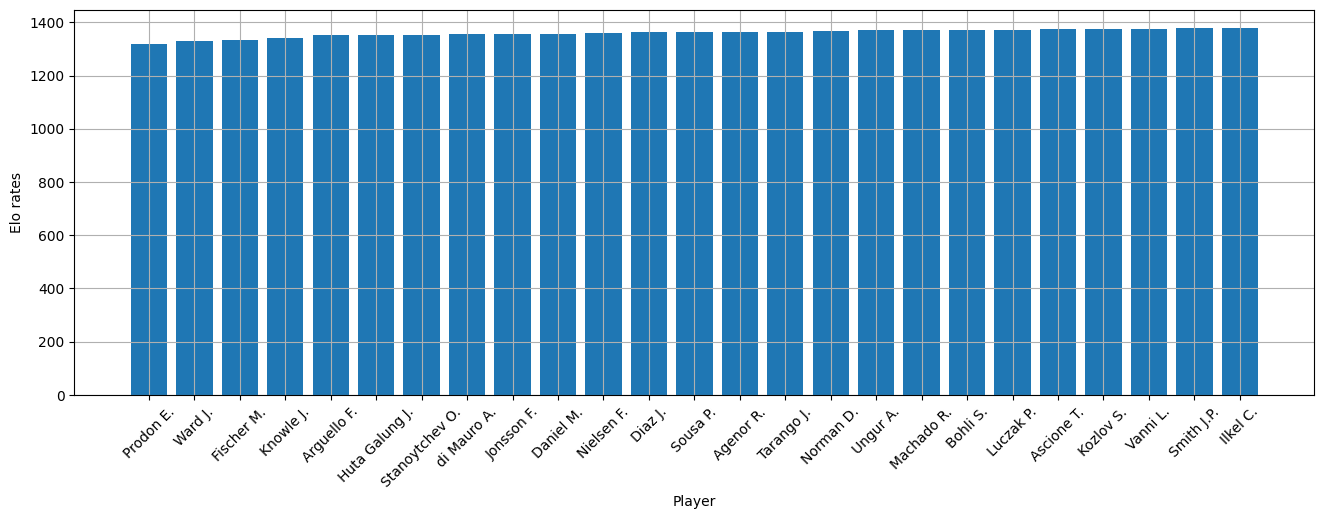

In [25]:
import matplotlib.pyplot as plt

n_top = 25
df_rates = elo_rates[["Player", "elo"]].sort_values(by="elo", ascending=True)

print(f"Top {n_top} players over all (without considering the field type):")

# Plot
plt.figure(figsize=(16, 5))
plt.grid()
plt.bar(x=df_rates["Player"].iloc[:n_top], height=df_rates["elo"].iloc[:n_top])

# Add labels and title
plt.xticks(rotation=45)
plt.xlabel("Player")
plt.ylabel("Elo rates")

# Save the plot
plt.savefig(f"report/final/pictures/bottom-{n_top}-elo-rates.pdf")

plt.show()

# Top 10 players in indoor courts and on hard surfaces:

Top 10 players in indoor courts and on hard surfaces:


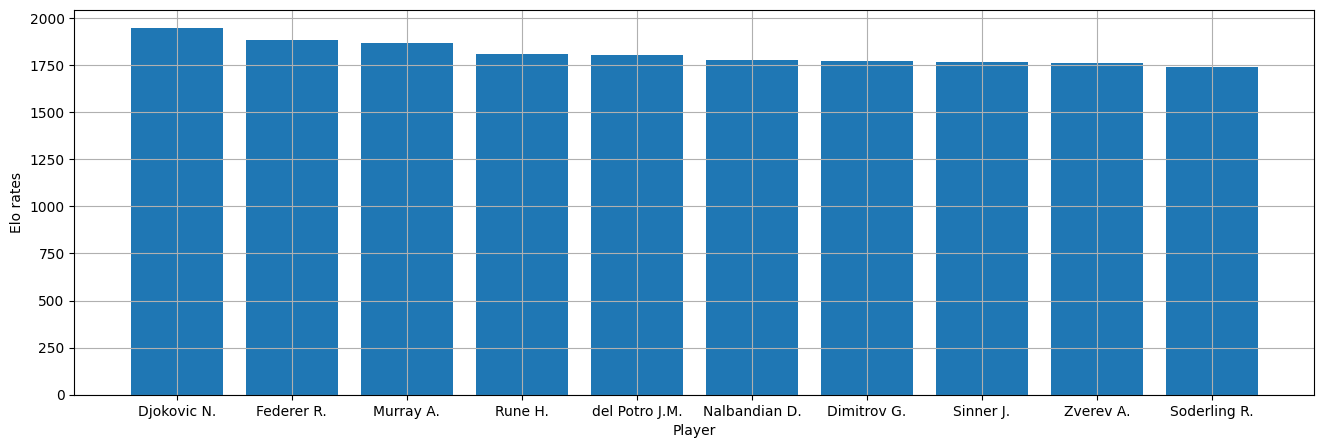

In [14]:
import matplotlib.pyplot as plt

index = 0
n_top = 10
court_surface_type = df_atp_reduced[["Court", "Surface"]].drop_duplicates().sort_values(by="Court").to_numpy().tolist()
field_type = f"{court_surface_type[index][0].lower()}_{court_surface_type[index][1].lower()}"

df_rates = elo_rates[["Player", f"elo_{field_type}"]].sort_values(by=f"elo_{field_type}", ascending=False)

print(f"Top {n_top} players in {court_surface_type[index][0].lower()} courts and on {court_surface_type[index][1].lower()} surfaces:")

# Plot
plt.figure(figsize=(16, 5))
plt.grid()
plt.bar(x=df_rates["Player"].iloc[:n_top], height=df_rates[f"elo_{field_type}"].iloc[:n_top])

# Add labels and title
plt.xlabel("Player")
plt.ylabel("Elo rates")

# Save the plot
plt.savefig(f"report/final/pictures/top-{n_top}-elo-rates-{court_surface_type[index][0].lower()}-{court_surface_type[index][1].lower()}.pdf")

plt.show()

# Top 10 players in indoor courts and on carpet surfaces:

Top 10 players in indoor courts and on carpet surfaces:


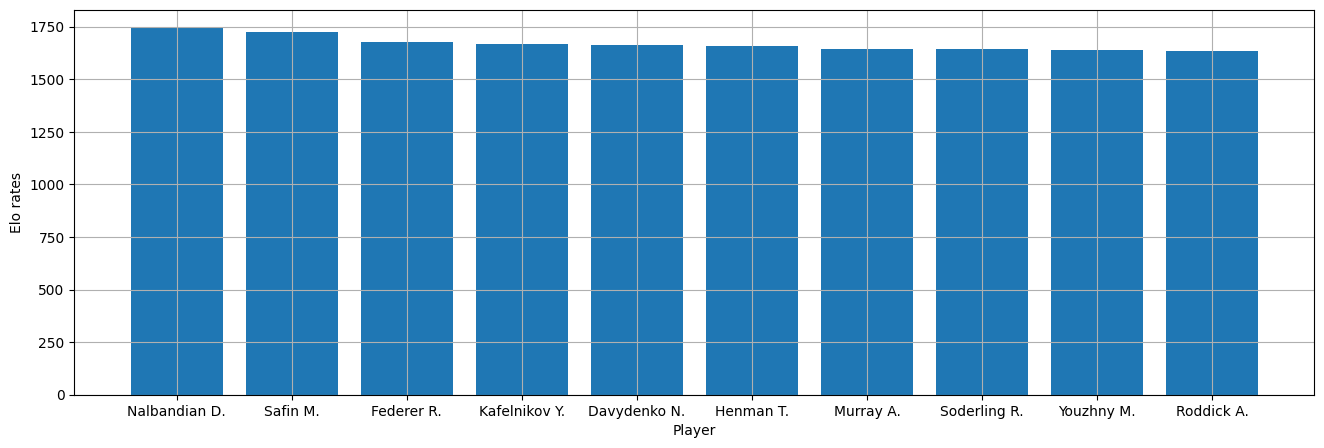

In [15]:
import matplotlib.pyplot as plt

index = 1
n_top = 10
court_surface_type = df_atp_reduced[["Court", "Surface"]].drop_duplicates().sort_values(by="Court").to_numpy().tolist()
field_type = f"{court_surface_type[index][0].lower()}_{court_surface_type[index][1].lower()}"

df_rates = elo_rates[["Player", f"elo_{field_type}"]].sort_values(by=f"elo_{field_type}", ascending=False)

print(f"Top {n_top} players in {court_surface_type[index][0].lower()} courts and on {court_surface_type[index][1].lower()} surfaces:")

# Plot
plt.figure(figsize=(16, 5))
plt.grid()
plt.bar(x=df_rates["Player"].iloc[:n_top], height=df_rates[f"elo_{field_type}"].iloc[:n_top])

# Add labels and title
plt.xlabel("Player")
plt.ylabel("Elo rates")

# Save the plot
plt.savefig(f"report/final/pictures/top-{n_top}-elo-rates-{court_surface_type[index][0].lower()}-{court_surface_type[index][1].lower()}.pdf")

plt.show()

# Top 10 players in indoor courts and on clay surfaces:

Top 10 players in indoor courts and on clay surfaces:


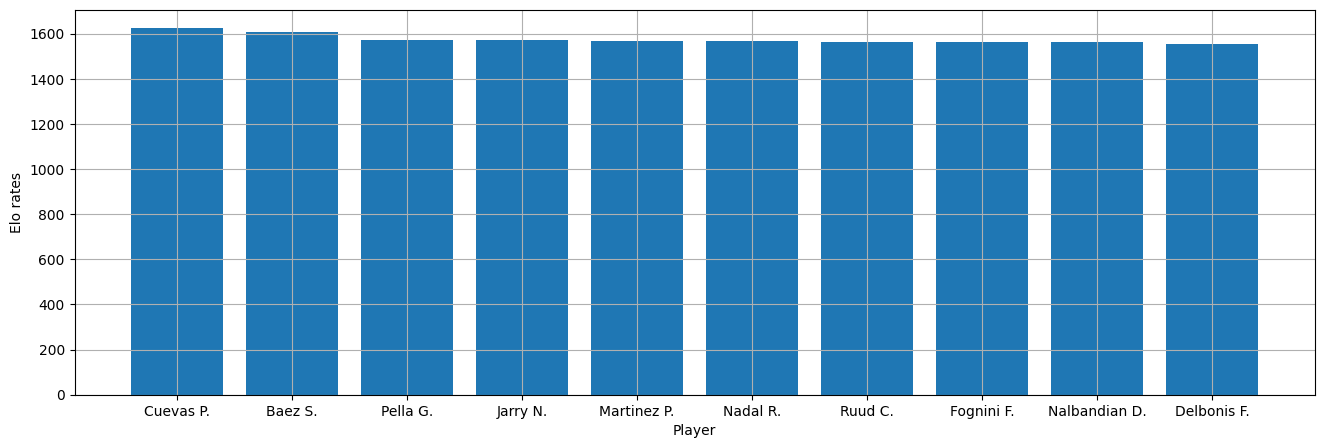

In [16]:
import matplotlib.pyplot as plt

index = 2
n_top = 10
court_surface_type = df_atp_reduced[["Court", "Surface"]].drop_duplicates().sort_values(by="Court").to_numpy().tolist()
field_type = f"{court_surface_type[index][0].lower()}_{court_surface_type[index][1].lower()}"

df_rates = elo_rates[["Player", f"elo_{field_type}"]].sort_values(by=f"elo_{field_type}", ascending=False)

print(f"Top {n_top} players in {court_surface_type[index][0].lower()} courts and on {court_surface_type[index][1].lower()} surfaces:")

# Plot
plt.figure(figsize=(16, 5))
plt.grid()
plt.bar(x=df_rates["Player"].iloc[:n_top], height=df_rates[f"elo_{field_type}"].iloc[:n_top])

# Add labels and title
plt.xlabel("Player")
plt.ylabel("Elo rates")

# Save the plot
plt.savefig(f"report/final/pictures/top-{n_top}-elo-rates-{court_surface_type[index][0].lower()}-{court_surface_type[index][1].lower()}.pdf")

plt.show()

# Top 10 players in outdoor courts and on hard surfaces:

Top 10 players in outdoor courts and on hard surfaces:


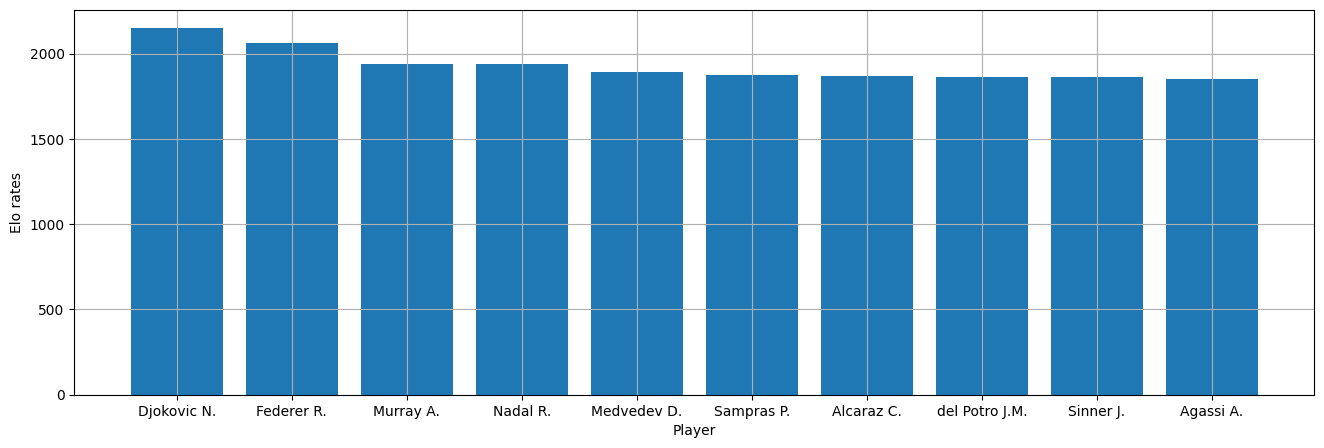

In [17]:
import matplotlib.pyplot as plt

index = 3
n_top = 10
court_surface_type = df_atp_reduced[["Court", "Surface"]].drop_duplicates().sort_values(by="Court").to_numpy().tolist()
field_type = f"{court_surface_type[index][0].lower()}_{court_surface_type[index][1].lower()}"

df_rates = elo_rates[["Player", f"elo_{field_type}"]].sort_values(by=f"elo_{field_type}", ascending=False)

print(f"Top {n_top} players in {court_surface_type[index][0].lower()} courts and on {court_surface_type[index][1].lower()} surfaces:")

# Plot
plt.figure(figsize=(16, 5))
plt.grid()
plt.bar(x=df_rates["Player"].iloc[:n_top], height=df_rates[f"elo_{field_type}"].iloc[:n_top])

# Add labels and title
plt.xlabel("Player")
plt.ylabel("Elo rates")

# Save the plot
plt.savefig(f"report/final/pictures/top-{n_top}-elo-rates-{court_surface_type[index][0].lower()}-{court_surface_type[index][1].lower()}.pdf")

plt.show()

# Top 10 players in outdoor courts and on clay surfaces:

Top 10 players in outdoor courts and on clay surfaces:


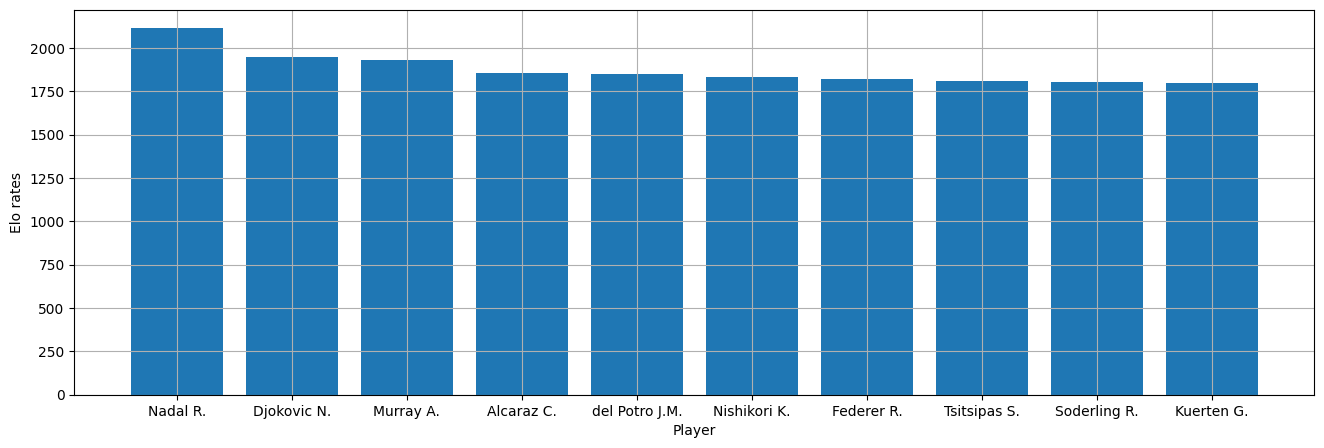

In [18]:
import matplotlib.pyplot as plt

index = 4
n_top = 10
court_surface_type = df_atp_reduced[["Court", "Surface"]].drop_duplicates().sort_values(by="Court").to_numpy().tolist()
field_type = f"{court_surface_type[index][0].lower()}_{court_surface_type[index][1].lower()}"

df_rates = elo_rates[["Player", f"elo_{field_type}"]].sort_values(by=f"elo_{field_type}", ascending=False)

print(f"Top {n_top} players in {court_surface_type[index][0].lower()} courts and on {court_surface_type[index][1].lower()} surfaces:")

# Plot
plt.figure(figsize=(16, 5))
plt.grid()
plt.bar(x=df_rates["Player"].iloc[:n_top], height=df_rates[f"elo_{field_type}"].iloc[:n_top])

# Add labels and title
plt.xlabel("Player")
plt.ylabel("Elo rates")

# Save the plot
plt.savefig(f"report/final/pictures/top-{n_top}-elo-rates-{court_surface_type[index][0].lower()}-{court_surface_type[index][1].lower()}.pdf")

plt.show()

# Top 10 players in outdoor courts and on grass surfaces:

Top 10 players in outdoor courts and on grass surfaces:


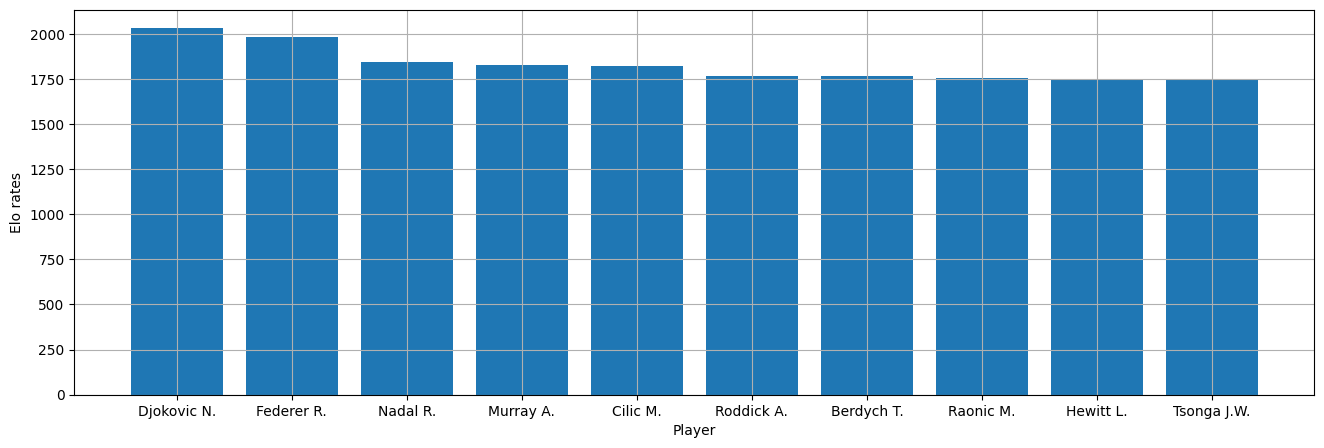

In [19]:
import matplotlib.pyplot as plt

index = 5
n_top = 10
court_surface_type = df_atp_reduced[["Court", "Surface"]].drop_duplicates().sort_values(by="Court").to_numpy().tolist()
field_type = f"{court_surface_type[index][0].lower()}_{court_surface_type[index][1].lower()}"

df_rates = elo_rates[["Player", f"elo_{field_type}"]].sort_values(by=f"elo_{field_type}", ascending=False)

print(f"Top {n_top} players in {court_surface_type[index][0].lower()} courts and on {court_surface_type[index][1].lower()} surfaces:")

# Plot
plt.figure(figsize=(16, 5))
plt.grid()
plt.bar(x=df_rates["Player"].iloc[:n_top], height=df_rates[f"elo_{field_type}"].iloc[:n_top])

# Add labels and title
plt.xlabel("Player")
plt.ylabel("Elo rates")

# Save the plot
plt.savefig(f"report/final/pictures/top-{n_top}-elo-rates-{court_surface_type[index][0].lower()}-{court_surface_type[index][1].lower()}.pdf")

plt.show()

Top 10 players in outdoor courts and on grass surfaces:


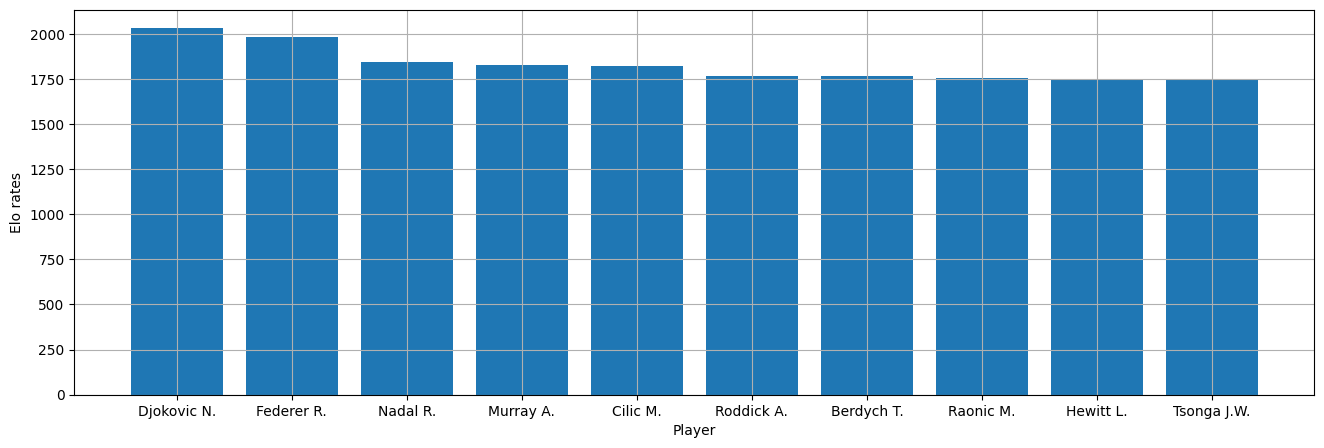

In [20]:
import matplotlib.pyplot as plt

index = 5
n_top = 10
court_surface_type = df_atp_reduced[["Court", "Surface"]].drop_duplicates().sort_values(by="Court").to_numpy().tolist()
field_type = f"{court_surface_type[index][0].lower()}_{court_surface_type[index][1].lower()}"

df_rates = elo_rates[["Player", f"elo_{field_type}"]].sort_values(by=f"elo_{field_type}", ascending=False)

print(f"Top {n_top} players in {court_surface_type[index][0].lower()} courts and on {court_surface_type[index][1].lower()} surfaces:")

# Plot
plt.figure(figsize=(16, 5))
plt.grid()
plt.bar(x=df_rates["Player"].iloc[:n_top], height=df_rates[f"elo_{field_type}"].iloc[:n_top])

# Add labels and title
plt.xlabel("Player")
plt.ylabel("Elo rates")

# Save the plot
plt.savefig(f"report/final/pictures/top-{n_top}-elo-rates-{court_surface_type[index][0].lower()}-{court_surface_type[index][1].lower()}.pdf")

plt.show()

Distribution of Elo rates on all court/surface type combinations


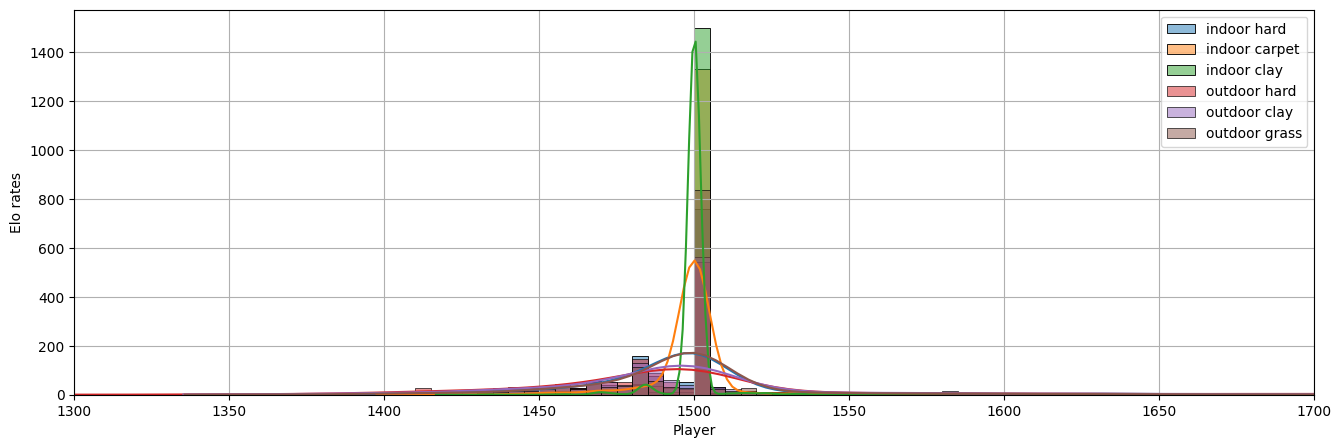

In [21]:
import matplotlib.pyplot as plt
import seaborn

bins_range = (1300, 1700)
bins_width = 5

# Plot
plt.figure(figsize=(16, 5))
plt.grid()

print(f"Distribution of Elo rates on all court/surface type combinations")


for court_surface_type in df_atp_reduced[["Court", "Surface"]].drop_duplicates().sort_values(by="Court").to_numpy().tolist():
    field_type = f"{court_surface_type[0].lower()}_{court_surface_type[1].lower()}"

    seaborn.histplot(elo_rates[f"elo_{field_type}"], bins=range(bins_range[0], bins_range[1]+bins_width, bins_width), kde=True, label=f"{court_surface_type[0].lower()} {court_surface_type[1].lower()}")

# Add labels and title
plt.legend()
plt.xlim([bins_range[0], bins_range[1]])
plt.xlabel("Player")
plt.ylabel("Elo rates")

# Save the plot
plt.savefig("report/final/pictures/elo-rate-field-type-dist.pdf")

plt.show()

The above graph shows the distribution of Elo rates on all court/surface type combinations. As it is observed, Elo rates are highly concentrated about 1500 in indoor carpet and clay field types in comparison with other court/surface types. This means that Elo rates in these field types carry less information about the skills of the players, as they have more or less the same rates. Accordingly, it doesn't sound reasonable to rely on the Elo rate for prediction in these field types.